## NLP with HuggingFace Tutorial 2 - NER Training.ipynb

## What is NER
NER stands for Named Entity Recognition, which is a natural language processing technique used to identify and classify named entities (such as names of people, places, organizations, dates, and more) in text. Here's a breakdown of NER in five steps:

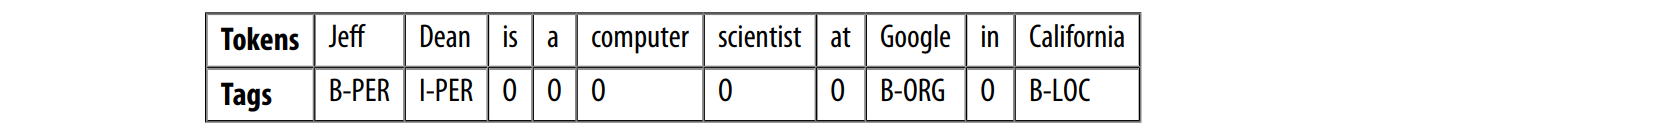

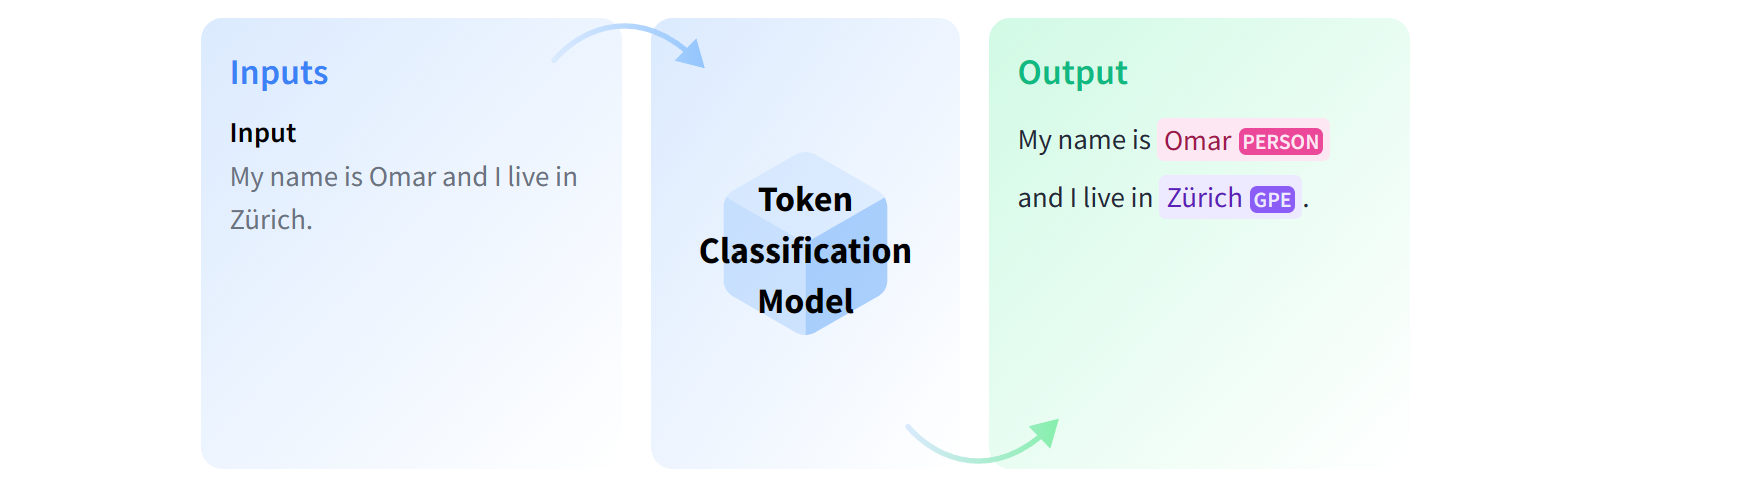
**DEMO:**
https://demos.explosion.ai/displacy-ent

**Text Input:**
NER begins with a piece of text, which can be a sentence, a paragraph, a document, or even a larger corpus of text.

**Tokenization:**
The input text is split into individual words or tokens. This process is called tokenization, and it's a crucial step because NER works on a token-by-token basis.

**Entity Recognition:**       
The tokenized text is analyzed to identify spans of tokens that correspond to named entities. NER systems use various techniques, such as rule-based approaches, machine learning models (like conditional random fields or deep learning models), or a combination of these methods to recognize entities.

**Entity/Token Classification:**
Once the entities are recognized, they are classified into predefined categories like "person," "organization," "location," "date," "number," etc. These categories help organize and provide context to the recognized entities.

**Output:**
The final output of the NER process is a structured representation of the original text with identified named entities and their corresponding categories. This output can be used for various purposes like information extraction, content summarization, sentiment analysis, and more.

## IOB NER Tagging Format
- IOB tagging, which stands for Inside-Outside-Beginning tagging, is a common technique used in named entity recognition (NER) to label tokens in a text sequence to indicate their positions within named entities. It helps identify the starting, inside, and outside parts of entities within the text.

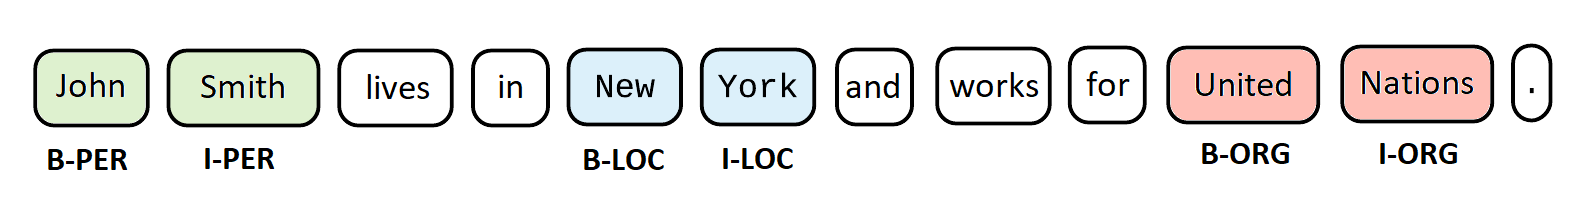
- IOB Tagging:
The tokens within a named entity are tagged as follows:

    - "B" (Beginning): The first token of an entity is tagged with "B" to indicate the beginning of the entity.
    - "I" (Inside): Tokens subsequent to the first token of an entity are tagged with "I" to indicate they are inside the entity.
    - "O" (Outside): Tokens that are not part of any named entity are tagged with "O" to indicate they are outside any entity.

- Tagging Format Article:
    - https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)

## What is Transormers?
- The Transformer architecture's key innovation is the mechanism of self-attention, which allows the model to weigh the importance of different words in a sentence relative to each other.
- This self-attention mechanism enables the model to capture contextual relationships between words regardless of their position in the input sequence.

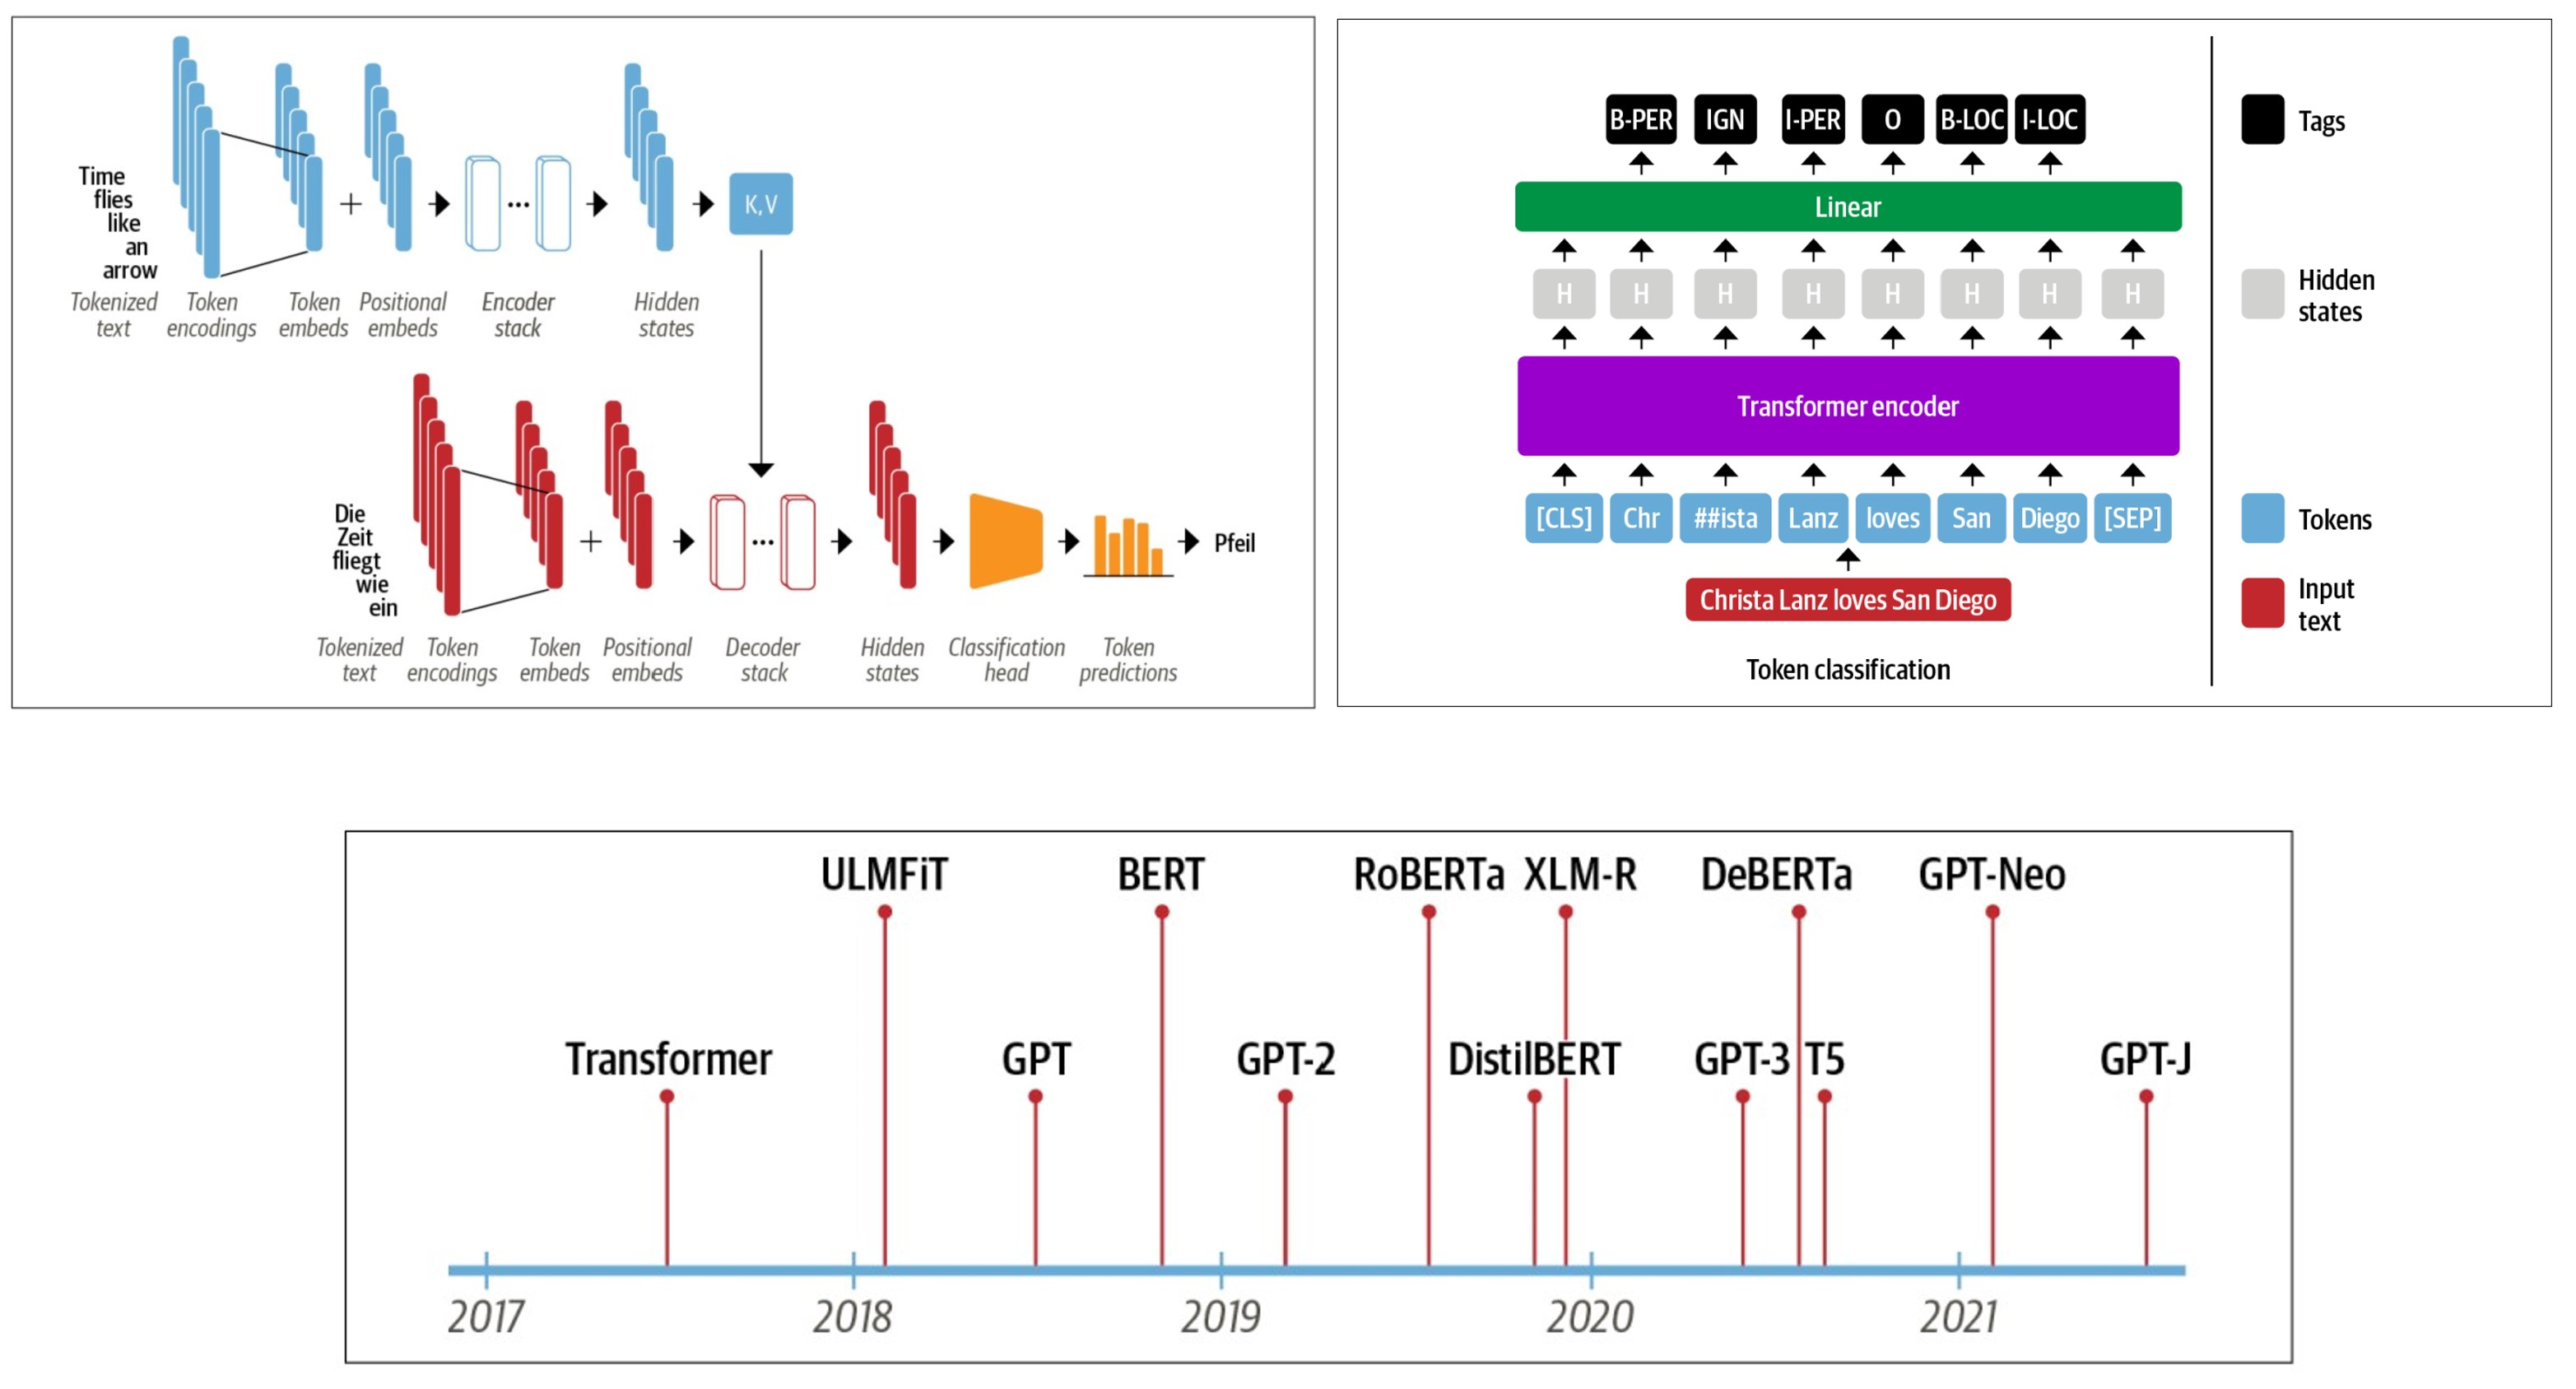

## The Dataset
### CONLLPP Dataset

https://huggingface.co/datasets/conllpp

- CoNLLpp is a corrected version of the CoNLL2003 NER dataset where labels of 5.38% of the sentences in the test set have been manually corrected. The original CoNLL2003 dataset is available at https://www.clips.uantwerpen.be/conll2003/ner/.

```
{
    "tokens": ["SOCCER", "-", "JAPAN", "GET", "LUCKY", "WIN", ",", "CHINA", "IN", "SURPRISE", "DEFEAT", "."],
    "original_ner_tags_in_conll2003": ["O", "O", "B-LOC", "O", "O", "O", "O", "B-PER", "O", "O", "O", "O"],
    "corrected_ner_tags_in_conllpp": ["O", "O", "B-LOC", "O", "O", "O", "O", "B-LOC", "O", "O", "O", "O"],
}

```

```
{
    "chunk_tags": [11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 13, 11, 21, 22, 11, 12, 17, 11, 21, 17, 11, 12, 12, 21, 22, 22, 13, 11, 0],
    "id": "0",
    "ner_tags": [0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "pos_tags": [12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 35, 24, 35, 37, 16, 21, 15, 24, 41, 15, 16, 21, 21, 20, 37, 40, 35, 21, 7],
    "tokens": ["The", "European", "Commission", "said", "on", "Thursday", "it", "disagreed", "with", "German", "advice", "to", "consumers", "to", "shun", "British", "lamb", "until", "scientists", "determine", "whether", "mad", "cow", "disease", "can", "be", "transmitted", "to", "sheep", "."]
}

```

## Coding


In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datasets import load_dataset

In [3]:
data = load_dataset('conllpp')
data


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [4]:
data['train'].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In [5]:
pd.DataFrame(data['train'][:])[['tokens', 'ner_tags']].iloc[0]

tokens      [EU, rejects, German, call, to, boycott, Briti...
ner_tags                          [3, 0, 7, 0, 0, 0, 7, 0, 0]
Name: 0, dtype: object

In [6]:
tags = data['train'].features['ner_tags'].feature

index2tag = {idx:tag for idx, tag in enumerate(tags.names)}
tag2index = {tag:idx for idx, tag in enumerate(tags.names)}

In [7]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

In [8]:
tags.int2str(3)

'B-ORG'

In [9]:
def create_tag_names(batch):
  tag_name = {'ner_tags_str': [tags.int2str(idx) for idx in batch['ner_tags']]}
  return tag_name

In [10]:
data = data.map(create_tag_names)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [11]:
pd.DataFrame(data['train'][:])[['tokens', 'ner_tags', 'ner_tags_str']].iloc[0]

tokens          [EU, rejects, German, call, to, boycott, Briti...
ner_tags                              [3, 0, 7, 0, 0, 0, 7, 0, 0]
ner_tags_str            [B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]
Name: 0, dtype: object

## Model Building

### Tokenization

In [12]:
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [13]:
tokenizer.is_fast

True

In [14]:
inputs = data['train'][0]['tokens']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.tokens())

['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']


In [15]:
print(data['train'][0]['tokens'])
print(data['train'][0]['ner_tags_str'])


['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [16]:
inputs.word_ids()

[None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]

In [17]:
def align_labels_with_tokens(labels, word_ids):
  new_labels = []
  current_word=None
  for word_id in word_ids:
    if word_id != current_word:
      current_word = word_id
      label = -100 if word_id is None else labels[word_id]
      new_labels.append(label)

    elif word_id is None:
      new_labels.append(-100)

    else:
      label = labels[word_id]

      if label%2==1:
        label = label + 1
      new_labels.append(label)

  return new_labels


In [18]:
labels = data['train'][0]['ner_tags']
word_ids = inputs.word_ids()
print(labels, word_ids)


[3, 0, 7, 0, 0, 0, 7, 0, 0] [None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]


In [19]:
align_labels_with_tokens(labels, word_ids)

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]

In [20]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)

  all_labels = examples['ner_tags']

  new_labels = []
  for i, labels in enumerate(all_labels):
    word_ids = tokenized_inputs.word_ids(i)
    new_labels.append(align_labels_with_tokens(labels, word_ids))

  tokenized_inputs['labels'] = new_labels

  return tokenized_inputs


In [21]:
tokenized_datasets = data.map(tokenize_and_align_labels, batched=True, remove_columns=data['train'].column_names)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [22]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

### Data Collation and Metrics

In [23]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [24]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(2)])
batch

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': tensor([[  101,  7270, 22961,  1528,  1840,  1106, 21423,  1418,  2495, 12913,
           119,   102],
        [  101,  1943, 14428,   102,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])}

### Metrics

In [25]:
!pip install seqeval
!pip install evaluate

import evaluate
metric = evaluate.load('seqeval')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=45cfa8c13ac544ffcbd837f4238fa35cc55a64fbf2ee4063a3a29de22a29f0b7
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00


In [26]:
ner_feature = data['train'].features['ner_tags']
ner_feature

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [27]:
label_names = ner_feature.feature.names
label_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [28]:
labels = data['train'][0]['ner_tags']
labels = [label_names[i] for i in labels]
labels

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

In [ ]:
predictions = labels.copy()
predictions[2] = "O"

metric.compute(predictions=[predictions], references=[labels])

{'MISC': {'precision': 1.0,
  'recall': 0.5,
  'f1': 0.6666666666666666,
  'number': 2},
 'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 0.6666666666666666,
 'overall_f1': 0.8,
 'overall_accuracy': 0.8888888888888888}

In [29]:
import numpy as np

def compute_metrics(eval_preds):
  logits, labels = eval_preds

  predictions = np.argmax(logits, axis=-1)

  true_labels = [[label_names[l] for l in label if l!=-100] for label in labels]

  true_predictions = [[label_names[p] for p,l in zip(prediction, label) if l!=-100]
                      for prediction, label in zip(predictions, labels)]

  all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

  return {"precision": all_metrics['overall_precision'],
          "recall": all_metrics['overall_recall'],
          "f1": all_metrics['overall_f1'],
          "accuracy": all_metrics['overall_accuracy']}

### Model Training

In [30]:
id2label = {i:label for i, label in enumerate(label_names)}
label2id = {label:i for i, label in enumerate(label_names)}

In [31]:
print(id2label)

{0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG', 5: 'B-LOC', 6: 'I-LOC', 7: 'B-MISC', 8: 'I-MISC'}


In [32]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
                                                    model_checkpoint,
                                                    id2label=id2label,
                                                    label2id=label2id)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
model.config.num_labels

9

In [34]:
from transformers import TrainingArguments

args = TrainingArguments("distilbert-finetuned-ner",
                         evaluation_strategy = "epoch",
                         save_strategy="epoch",
                         learning_rate = 2e-5,
                         num_train_epochs=3,
                         weight_decay=0.01)

In [35]:
from transformers import Trainer
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = tokenized_datasets['train'],
                  eval_dataset = tokenized_datasets['validation'],
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=tokenizer)

trainer.train()

TrainOutput(global_step=5268, training_loss=0.07863904204256351, metrics={'train_runtime': 320.015, 'train_samples_per_second': 131.628, 'train_steps_per_second': 16.462, 'total_flos': 460336113849150.0, 'train_loss': 0.07863904204256351, 'epoch': 3.0})

In [38]:
from transformers import pipeline

checkpoint = "/content/distilbert-finetuned-ner/checkpoint-5268"
token_classifier = pipeline(
    "token-classification", model=checkpoint, aggregation_strategy="simple"
)

token_classifier("My name is Dr. Deepak Sharma. I work as Postdoctoral Researcher at University of Kiel, Kiel, Germany")

[{'entity_group': 'PER',
  'score': 0.91801554,
  'word': 'Deepak Sharma',
  'start': 15,
  'end': 28},
 {'entity_group': 'ORG',
  'score': 0.51599336,
  'word': '##ctoral',
  'start': 46,
  'end': 52},
 {'entity_group': 'ORG',
  'score': 0.8532603,
  'word': 'University of Kiel',
  'start': 67,
  'end': 85},
 {'entity_group': 'LOC',
  'score': 0.5461172,
  'word': 'Kiel',
  'start': 87,
  'end': 91},
 {'entity_group': 'LOC',
  'score': 0.99808455,
  'word': 'Germany',
  'start': 93,
  'end': 100}]

In [39]:
!zip -r distilbert_ner.zip "/content/distilbert-finetuned-ner/checkpoint-5268"

  adding: content/distilbert-finetuned-ner/checkpoint-5268/ (stored 0%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/special_tokens_map.json (deflated 42%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/model.safetensors (deflated 8%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/config.json (deflated 51%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/scheduler.pt (deflated 56%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/trainer_state.json (deflated 70%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/optimizer.pt (deflated 25%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/tokenizer_config.json (deflated 76%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/rng_state.pth (deflated 25%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/tokenizer.json (deflated 70%)
  adding: content/distilbert-finetuned-ner/checkpoint-5268/vocab.txt (deflated 49%)
  adding: content/distilbert-